In [1]:

import matplotlib.pyplot as plt
import Sudoku_matrix_9x9 as s_9x9
import sudoku_dfs as dfs
import time
from func_timeout import func_set_timeout
from func_timeout import FunctionTimedOut

In [2]:

@func_set_timeout(3)
def DLX(dic):
    matrix = s_9x9.generate_matrix(dic)
    t1 = time.perf_counter()
    sus = matrix.dancing([], 1)
    t2 = time.perf_counter()
    t = t2 - t1
    return t, sus

@func_set_timeout(3)
def DFS(dic):
    grid = dfs.load_sudoku_from_dict(dic)
    t1 = time.perf_counter()
    sus = dfs.sudoku_solver(grid)
    t2 = time.perf_counter()
    t = t2 - t1
    return t, sus is not None

def test(generating_func, init_func, n, init_range):
    inits1 = []
    times1 = []    

    inits = []

    fail_counts1 = []
    fail_rates1 = []
    timeout_counts1 = []
    timeout_rates1 = []
    avg_times1 = []

    for init in init_range:
        
        total_time1 = 0
        fail_count1 = 0
        timeout_count1 = 0

        for i in range(n):
            try:
                dic = init_func(init)
                res1 = generating_func(dic)
                inits1.append(init)
                times1.append(res1[0])
                total_time1 += res1[0]
                if not res1[1]: fail_count1 += 1
            except FunctionTimedOut:
                timeout_count1 += 1

        inits.append(init)
        
        fail_counts1.append(fail_count1)
        fail_rates1.append(fail_count1 / (n - timeout_count1))
        timeout_counts1.append(timeout_count1)
        timeout_rates1.append(timeout_count1 / n)
        avg_times1.append(total_time1 / (n - timeout_count1))
    
    return (inits1, times1), (inits, avg_times1), (inits, fail_rates1), (inits, timeout_rates1)



In [7]:
n = 2000
init_range = range(0, 21)
res = (
 test(DFS, s_9x9.sudoku_init_rand, n, init_range),
 test(DFS, s_9x9.sudoku_init, n, init_range),
 test(DLX, s_9x9.sudoku_init_rand, n, init_range),
 test(DLX, s_9x9.sudoku_init, n, init_range)
 )

[[-0.15118696001009085, 3.1774253600335216], [0.0030368784528442124, 0.1830536700537209], [-0.012258883248730965, 0.25743654822335027], [-0.006725000000000001, 0.14122500000000002]]


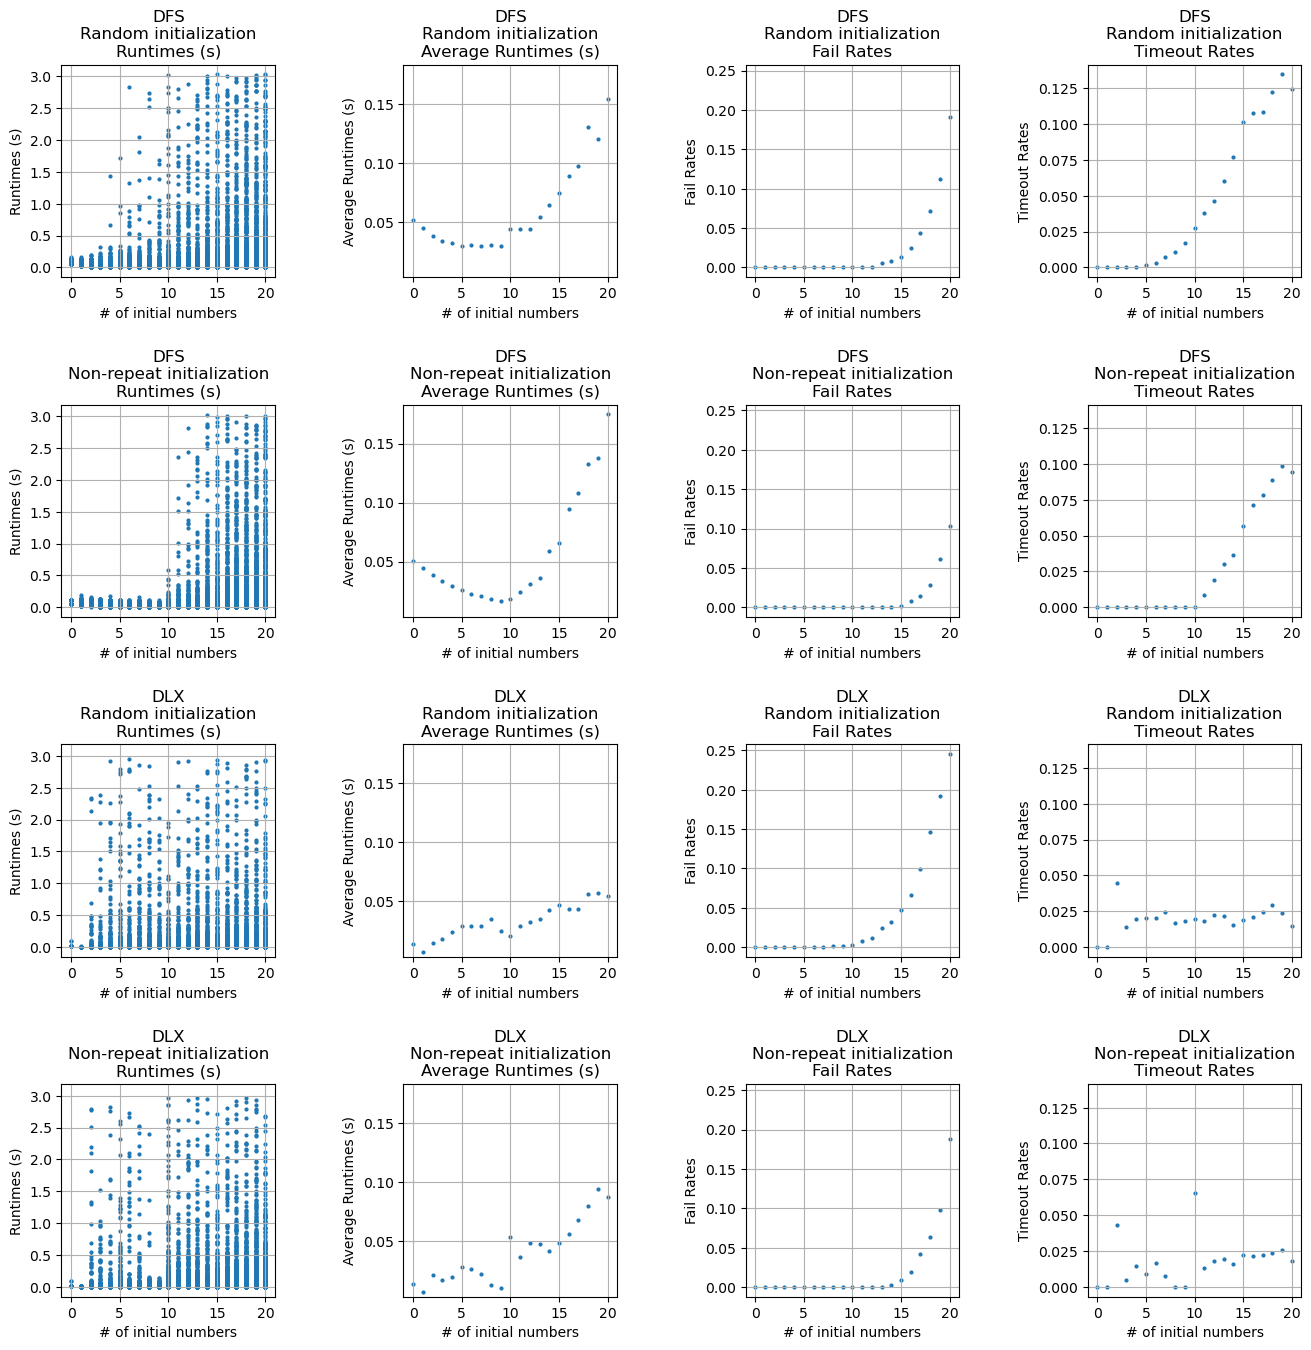

In [8]:

fig = plt.figure(figsize=(16, 16))
fig.subplots_adjust( wspace=0.6,hspace=0.6)

titles = []
y_labels = []
for i in range(len(res)):
    titles.append([])
    y_labels.append([])
    for j in range(len(res[i])):
        titles[i].append('')
        y_labels[i].append('')
        match j:
            case 0:
                y_labels[i][j] = 'Runtimes (s)'
            case 1:
                y_labels[i][j] = 'Average Runtimes (s)'
            case 2:
                y_labels[i][j] = 'Fail Rates'
            case 3:
                y_labels[i][j] = 'Timeout Rates'
        titles[i][j] += ('DFS' if i < 2 else 'DLX') + '\n' + \
                        ('Random initialization' if i % 2 == 0 else 'Non-repeat initialization') + '\n' + \
                        y_labels[i][j]
        
axs:list[list[plt.Axes]] = []
for i in range(len(res)):
    axs.append([])
    for j in range(len(res[i])):
        axs[i].append(fig.add_subplot(len(res), len(res[i]), len(res[i]) * i + j + 1))
        axs[i][j].scatter(res[i][j][0], res[i][j][1], 4)
        axs[i][j].set_title(titles[i][j])
        axs[i][j].set_xlabel('# of initial numbers')
        axs[i][j].set_ylabel(y_labels[i][j])
        axs[i][j].grid(True)

y_lims = [[100, 0], [100, 0], [100, 0], [100, 0]]

for i in range(len(res)):
    for j in range(len(res[i])):
        if axs[i][j].get_ylim()[1] > y_lims[j][1]:
            y_lims[j][1] = axs[i][j].get_ylim()[1]
        if axs[i][j].get_ylim()[0] < y_lims[j][0]:
            y_lims[j][0] = axs[i][j].get_ylim()[0]

print(y_lims)
for i in range(len(res)):
    for j in range(len(res[i])):
        axs[i][j].set_ylim((y_lims[j][0], y_lims[j][1]))



